This project involves performing an exploratory data analysis (EDA) on Airbnb listings data for a particular city. The analysis will focus on factors such as price, availability, location, and property type to identify trends and patterns in the demand for Airbnb listings in the city. The project will include data cleaning, visualization, and statistical analysis using tools such as Python and Jupyter Notebook. Data: http://insideairbnb.com/get-the-data/

# 1 Libraries Importing & Read data

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [269]:
df = pd.read_csv('listings.csv')

# 2 Explore Data

In [270]:
df.shape

(17230, 18)

In [271]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057
2,41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22,HUTB-003549
3,32711,Rental unit in Barcelona · ★4.43 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,91,2023-03-22,0.63,3,256,24,HUTB-001722
4,46153,Rental unit in Barcelona · ★4.20 · 2 bedrooms ...,90417,Etain (Marnie),Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,5,2022-07-31,0.03,2,176,1,Exempt


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17230 non-null  int64  
 1   name                            17230 non-null  object 
 2   host_id                         17230 non-null  int64  
 3   host_name                       17228 non-null  object 
 4   neighbourhood_group             17230 non-null  object 
 5   neighbourhood                   17230 non-null  object 
 6   latitude                        17230 non-null  float64
 7   longitude                       17230 non-null  float64
 8   room_type                       17230 non-null  object 
 9   price                           17230 non-null  int64  
 10  minimum_nights                  17230 non-null  int64  
 11  number_of_reviews               17230 non-null  int64  
 12  last_review                     

# 3 cleaning Data

#### Remove unnecessary columns

In [273]:
df.drop(['id', 'name', 'host_id', 'host_name','neighbourhood_group','license'],axis=1,inplace=True)

In [274]:
df.isna().sum()

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4032
reviews_per_month                 4032
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [275]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'].fillna(df['last_review'].median(), inplace=True)

In [276]:
df.isna().sum()

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 4032
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [277]:
df.duplicated().sum()

10

In [278]:
df.drop_duplicates()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8
1,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13
2,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22
3,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,91,2023-03-22,0.63,3,256,24
4,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,5,2022-07-31,0.03,2,176,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17225,"Sant Pere, Santa Caterina i la Ribera",41.389625,2.179024,Private room,65,1,0,2023-05-08,NaN,33,365,0
17226,Sant Gervasi - la Bonanova,41.403783,2.136933,Entire home/apt,63,31,0,2023-05-08,NaN,23,145,0
17227,el Barri Gòtic,41.384334,2.175138,Private room,65,1,0,2023-05-08,NaN,33,361,0
17228,el Raval,41.376588,2.174328,Entire home/apt,100,1,0,2023-05-08,NaN,33,355,0


# 4 Data Analysis(statistical) & Visualization

In [279]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17230.000000,17230.000000,17230.000000,17230.000000,17230.000000,13198.000000,17230.000000,17230.000000,17230.000000
mean,41.391854,2.167149,177.689959,14.375218,42.310215,1.438544,28.073244,172.454208,11.988799
std,0.013882,0.017245,876.724391,33.905670,83.509961,1.839384,53.164134,124.998430,23.295948
min,41.352608,2.091590,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,41.381040,2.157150,55.000000,1.000000,1.000000,0.230000,1.000000,56.000000,0.000000
50%,41.389566,2.168260,111.000000,3.000000,7.000000,0.870000,5.000000,171.000000,2.000000
75%,41.401190,2.177500,214.000000,31.000000,43.000000,2.100000,25.000000,293.000000,16.000000
max,41.459560,2.227710,90000.000000,1125.000000,1751.000000,50.640000,265.000000,365.000000,768.000000


In [280]:
df.describe(include=['object'])

,neighbourhood,room_type
count,17230,17230
unique,70,4
top,la Dreta de l'Eixample,Entire home/apt
freq,2213,10262


In [281]:
df.describe(include=['datetime'])

C:\Users\amuhm\AppData\Local\Temp\ipykernel_12820\427032358.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['datetime'])


,last_review
count,17230
unique,1632
top,2023-05-08 00:00:00
freq,4111
first,2011-06-23 00:00:00
last,2023-06-09 00:00:00


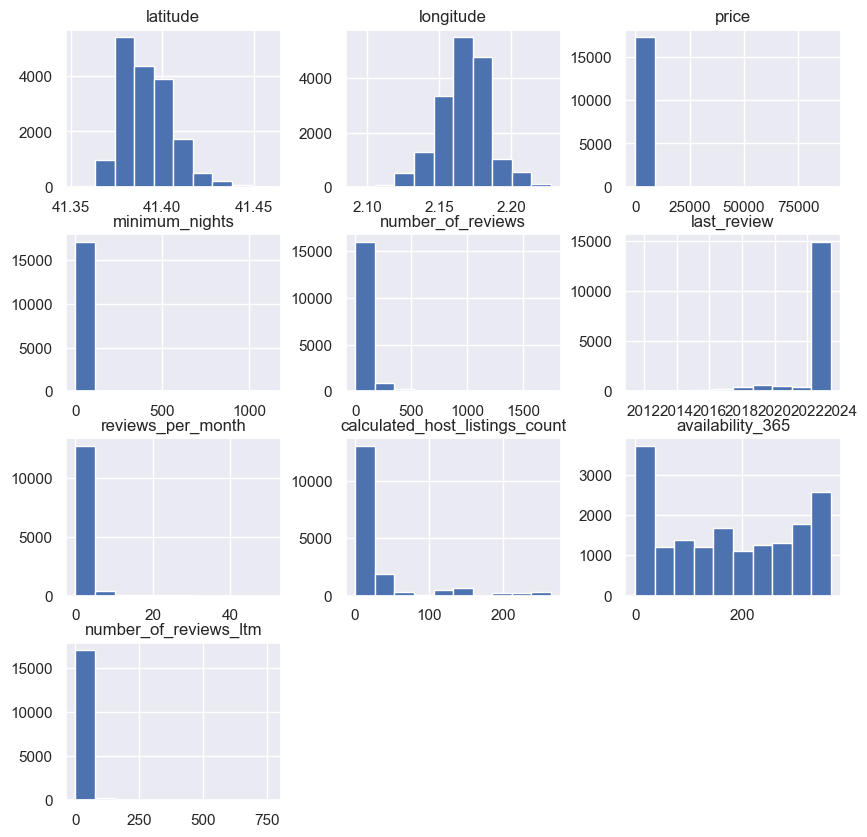

In [282]:
df.hist(figsize=(10,10),edgecolor='w',linewidth=1)
plt.show()

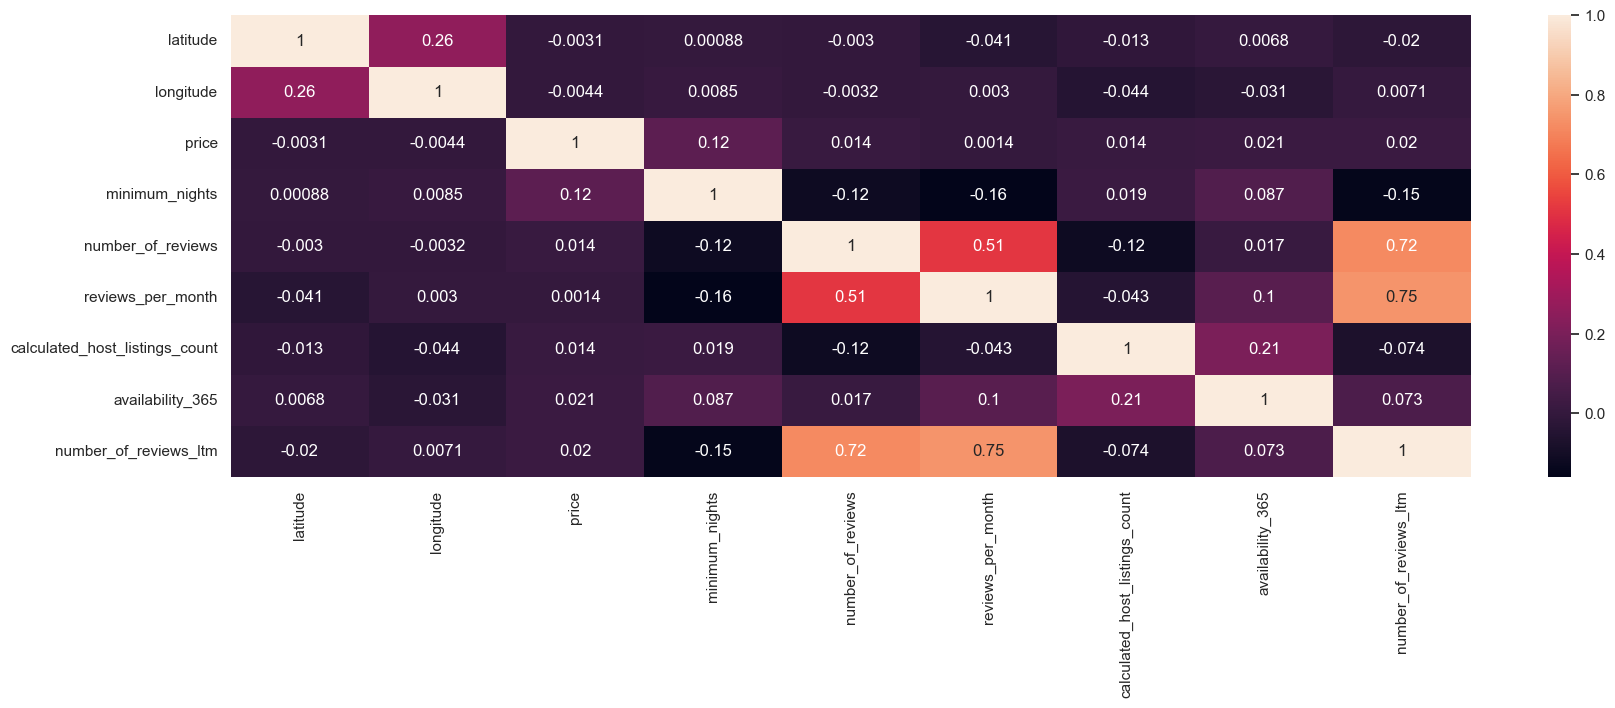

In [283]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

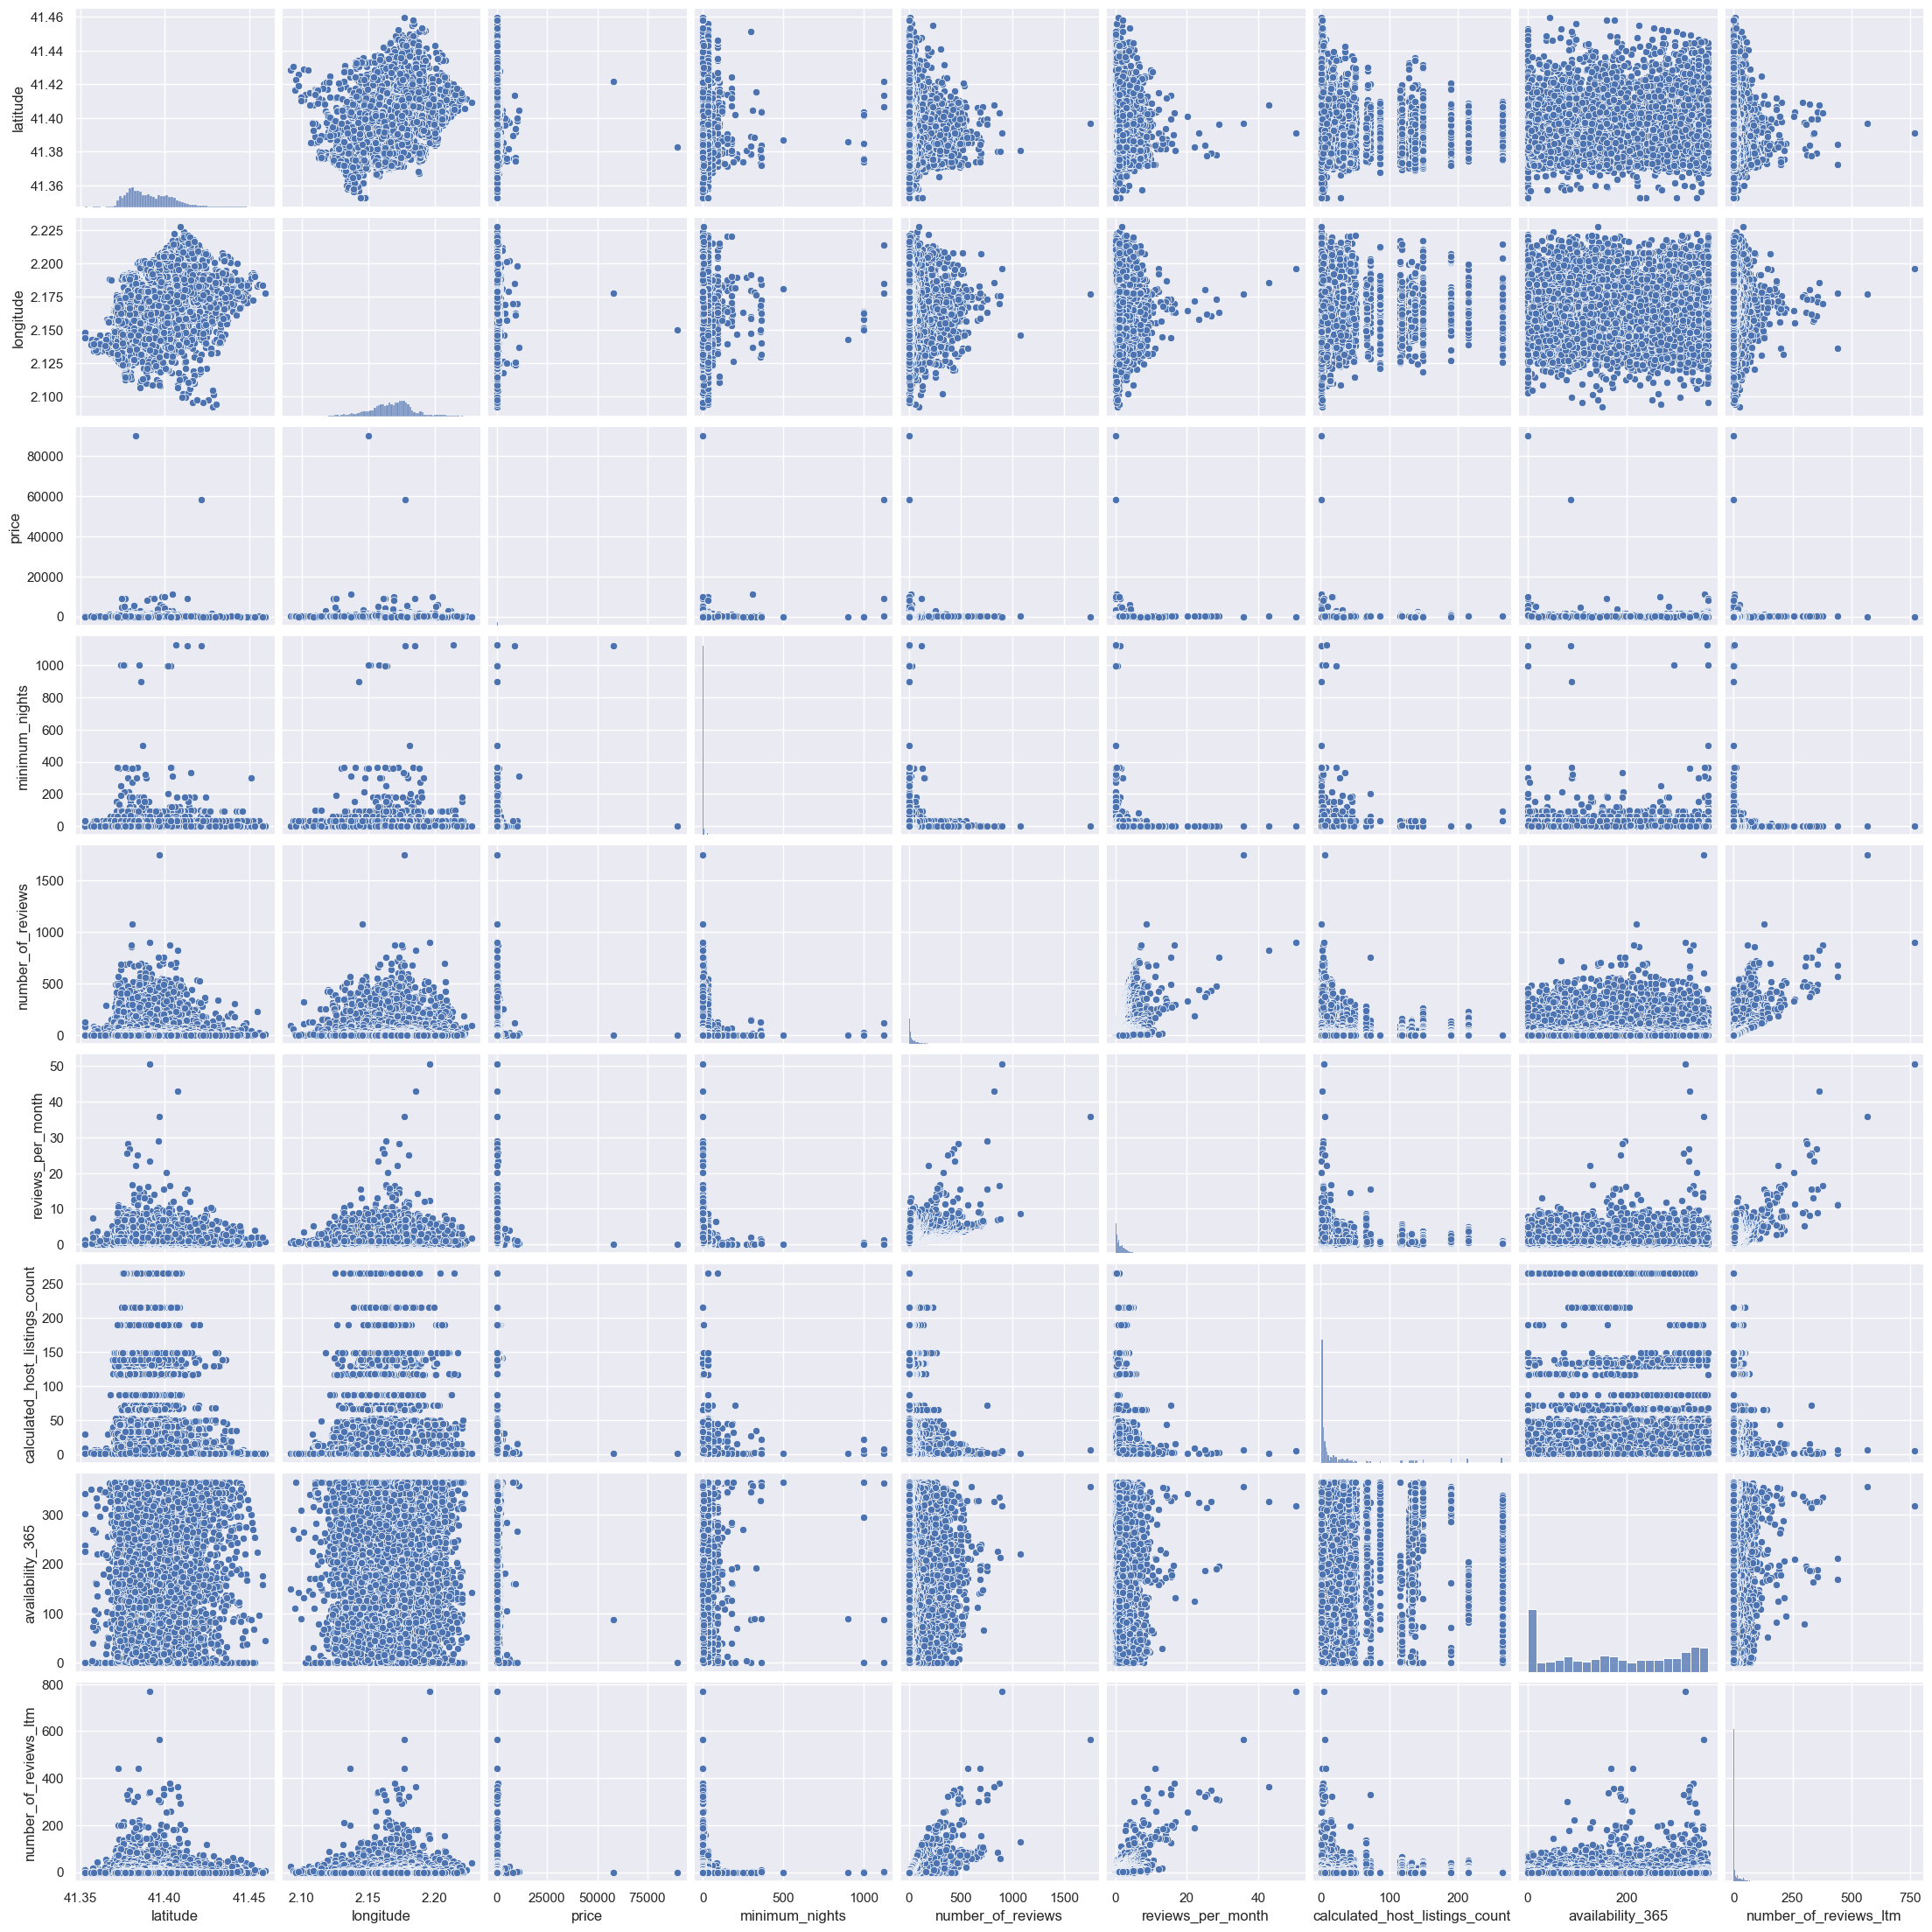

In [284]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='price'>

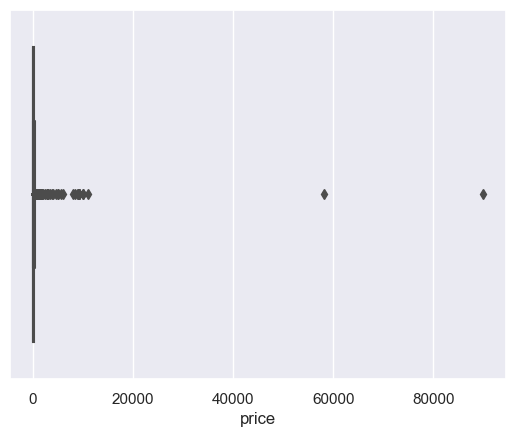

In [285]:
sns.boxplot(x= df['price'])

#### There are outliers, so I will divide the price to make it clearer.

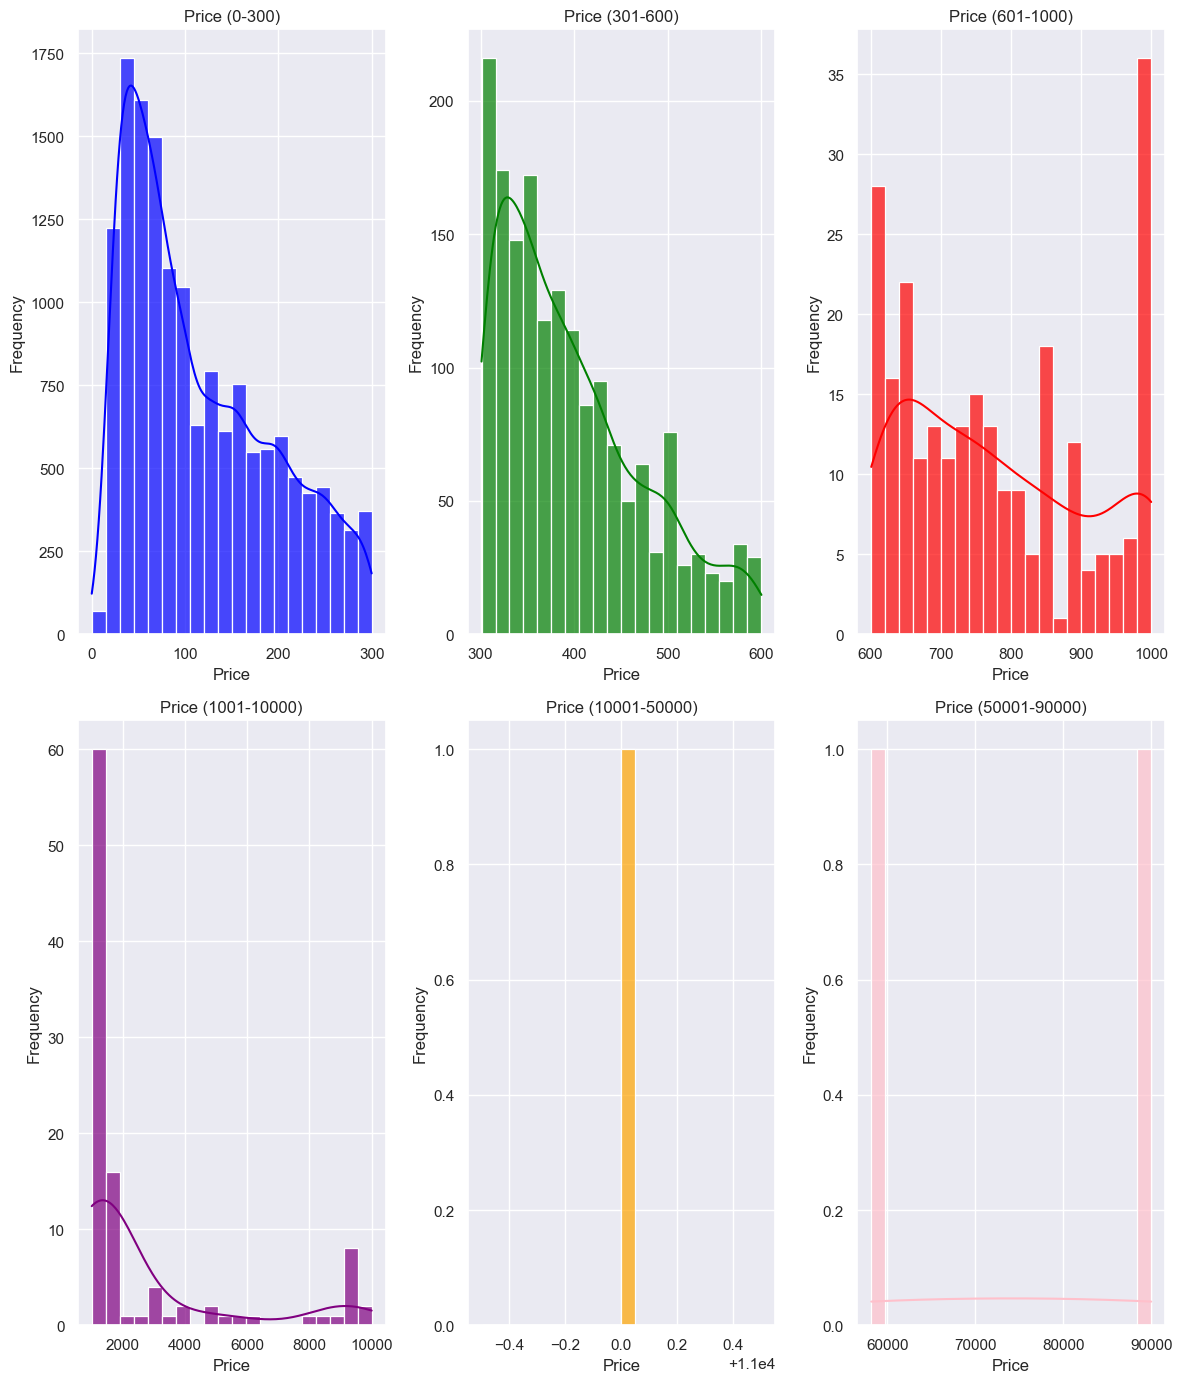

In [286]:
price_range_1 = df[(df['price'] >= 0) & (df['price'] <= 300)]
price_range_2 = df[(df['price'] > 300) & (df['price'] <= 600)]
price_range_3 = df[(df['price'] > 600) & (df['price'] <= 1000)]
price_range_4 = df[(df['price'] > 1000) & (df['price'] <= 10000)]
price_range_5 = df[(df['price'] > 10000) & (df['price'] <= 50000)]
price_range_6 = df[(df['price'] > 50000) & (df['price'] <= 90000)]

sns.set(style="darkgrid")

plt.figure(figsize=(12, 14))


plt.subplot(2, 3, 1)
sns.histplot(data=price_range_1, x="price", bins=20, color='blue', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (0-300)')


plt.subplot(2, 3, 2)
sns.histplot(data=price_range_2, x="price", bins=20, color='green', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (301-600)')


plt.subplot(2, 3, 3)
sns.histplot(data=price_range_3, x="price", bins=20, color='red', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (601-1000)')


plt.subplot(2, 3, 4)
sns.histplot(data=price_range_4, x="price", bins=20, color='purple', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (1001-10000)')

# الرسم الخامس (أسفل اليمين)
plt.subplot(2, 3, 5)
sns.histplot(data=price_range_5, x="price", bins=20, color='orange', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (10001-50000)')

# الرسم السادس (أسفل اليسار)
plt.subplot(2, 3, 6)
sns.histplot(data=price_range_6, x="price", bins=20, color='pink', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (50001-90000)')

plt.tight_layout()
plt.show()

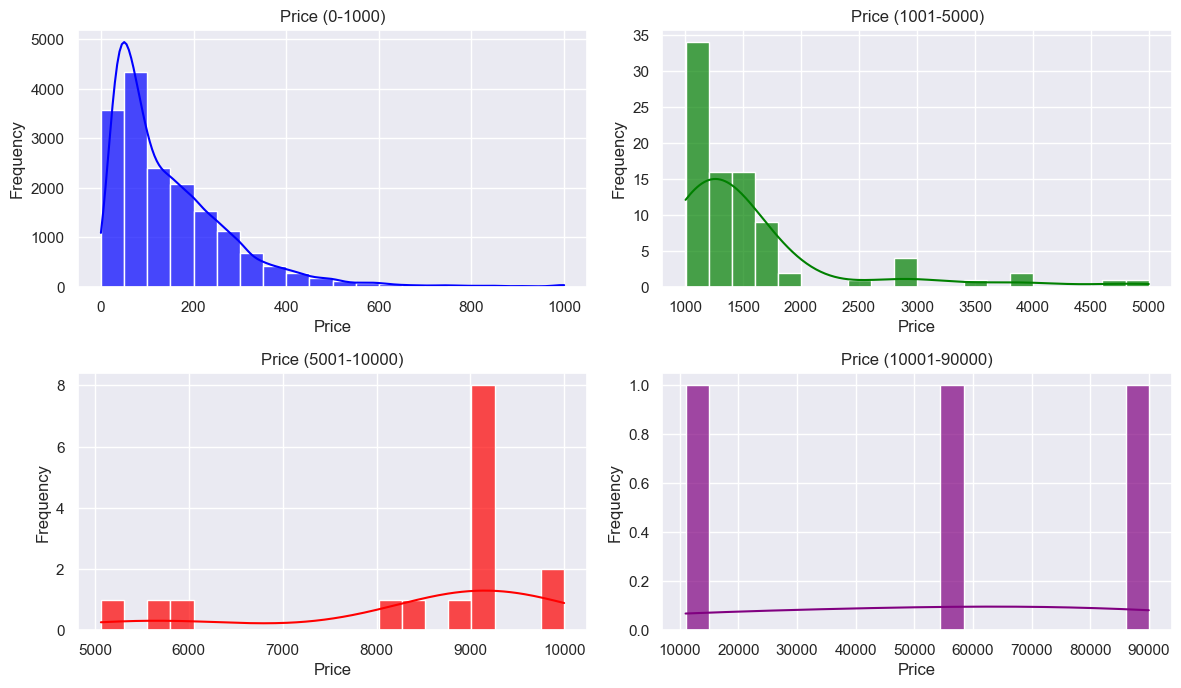

In [287]:
price_range_1 = df[(df['price'] >= 0) & (df['price'] <= 1000)]
price_range_2 = df[(df['price'] > 1000) & (df['price'] <= 5000)]
price_range_3 = df[(df['price'] > 5000) & (df['price'] <= 10000)]
price_range_4 = df[(df['price'] > 10000) & (df['price'] <= 90000)]

sns.set(style="darkgrid")

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
sns.histplot(data=price_range_1, x="price", bins=20, color='blue', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (0-1000)')

plt.subplot(3, 2, 2)
sns.histplot(data=price_range_2, x="price", bins=20, color='green', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (1001-5000)')

plt.subplot(3, 2, 3)
sns.histplot(data=price_range_3, x="price", bins=20, color='red', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (5001-10000)')

plt.subplot(3, 2, 4)
sns.histplot(data=price_range_4, x="price", bins=20, color='purple', alpha=0.7, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price (10001-90000)')

plt.tight_layout()
plt.show()

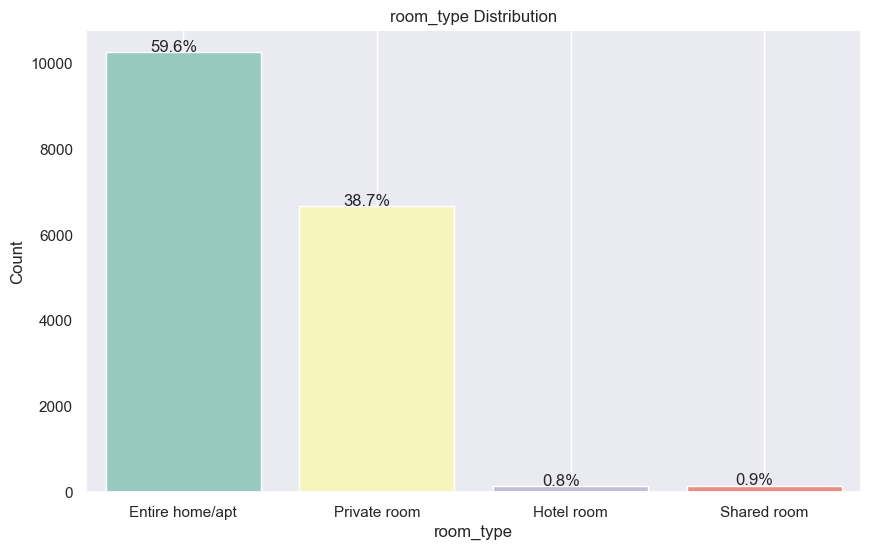

In [288]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='room_type', palette='Set3')

# إضافة النسب المئوية على كل عمود
total = len(df)  # إجمالي عدد البيانات

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # حساب النسبة المئوية
    x = p.get_x() + p.get_width() / 2 - 0.05  # موقع النص داخل العمود
    y = p.get_height() + 15  # ارتفاع النص عن العمود
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')
plt.xlabel('room_type')
plt.ylabel('Count')
plt.title('room_type Distribution')
plt.grid()
plt.show()

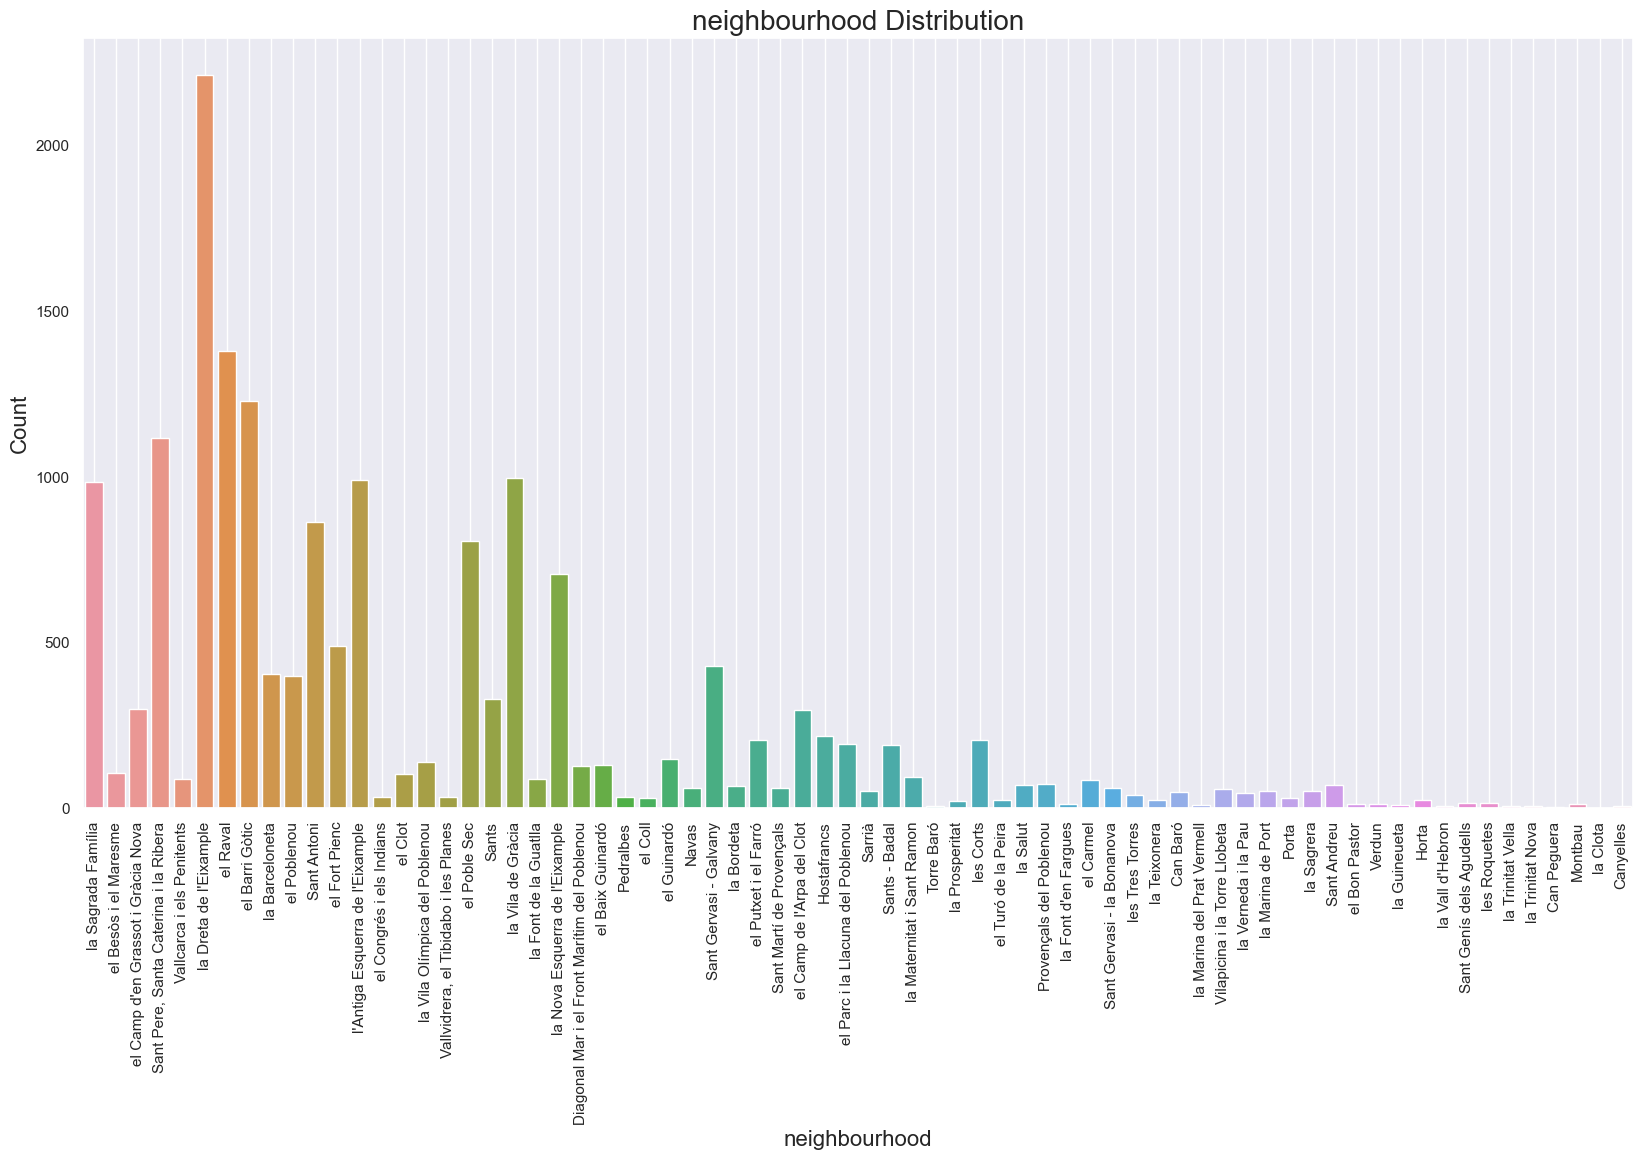

In [289]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='neighbourhood')
plt.xlabel('neighbourhood',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('neighbourhood Distribution',fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

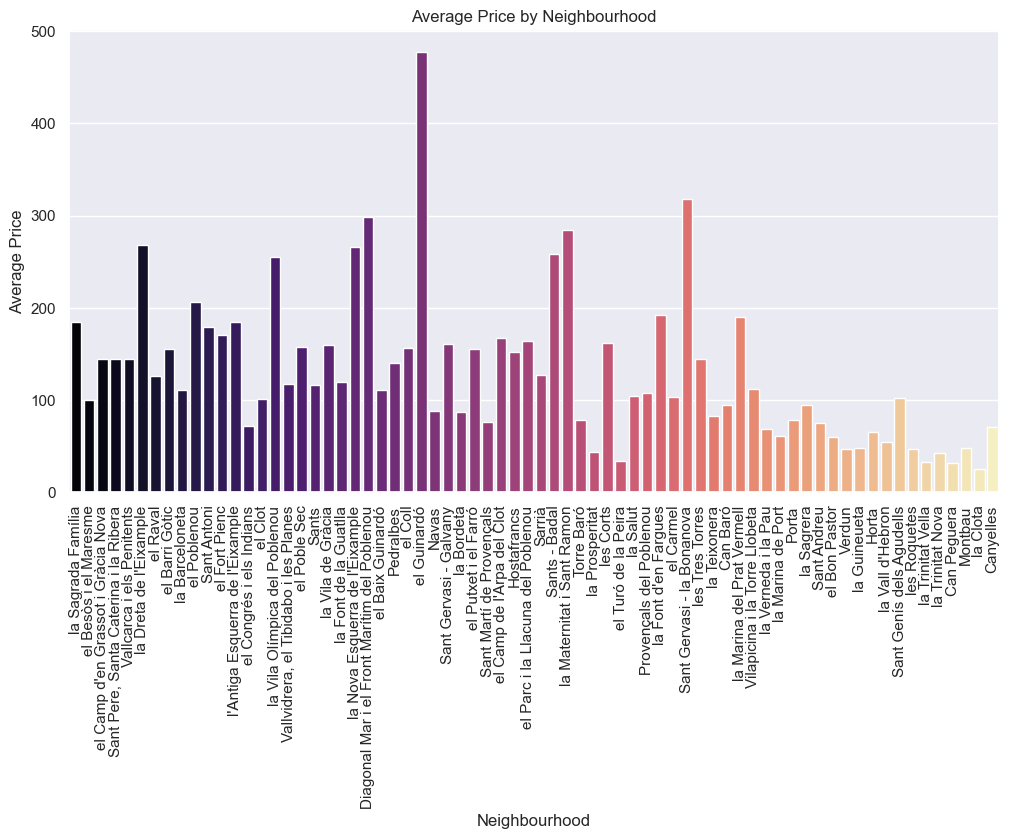

In [290]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighbourhood', y='price', ci=None, palette='magma')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

What I was able to understand is that the prices that are in demand range from 0 to 300

The most rented room type is Entier home and the least is shared room

The most popular neighborhood is La Dreta de l'Eixample and its average price is 280.


## َQ&A
### Is there a relationship between real estate availability and prices?


In [291]:
df['price_category'] = pd.cut(df['price'], bins=[0, 1000, 5000, 10000, 90000],
                              labels=['0-1000', '1001-5000', '5001-10000', '10001-90000'])

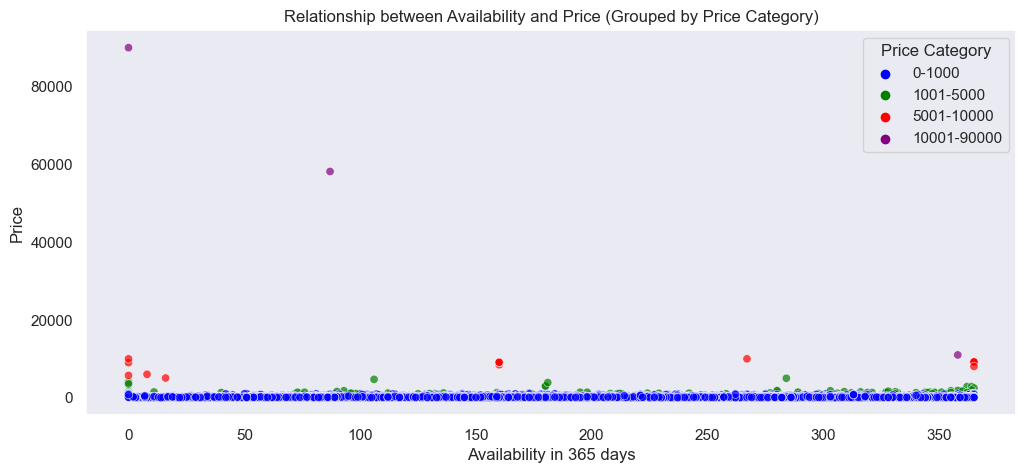

In [292]:
plt.figure(figsize=(12, 5))

colors = {'0-1000': 'blue', '1001-5000': 'green', '5001-10000': 'red', '10001-90000': 'purple'}

sns.scatterplot(data=df, x='availability_365', y='price', hue='price_category', palette=colors, alpha=0.7)

plt.xlabel('Availability in 365 days')
plt.ylabel('Price')
plt.title('Relationship between Availability and Price (Grouped by Price Category)')
plt.legend(title='Price Category')
plt.show()

In [293]:
df[df['price']>10000]

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category
3096,la Nova Esquerra de l'Eixample,41.38261,2.14987,Private room,90000,1,1,2016-09-20,0.01,1,0,0,10001-90000
5500,el Guinardó,41.42154,2.17763,Private room,58165,1124,1,2019-02-22,0.02,1,87,0,10001-90000
7555,Sant Gervasi - la Bonanova,41.40438,2.13695,Private room,11000,310,17,2022-06-11,0.37,1,358,1,10001-90000


In [294]:
df[df['neighbourhood']=="la Nova Esquerra de l'Eixample"]

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category
52,la Nova Esquerra de l'Eixample,41.381840,2.151190,Entire home/apt,133,2,189,2023-06-04,1.67,1,235,53,0-1000
66,la Nova Esquerra de l'Eixample,41.379110,2.153560,Entire home/apt,316,1,123,2023-05-25,0.93,4,37,26,0-1000
92,la Nova Esquerra de l'Eixample,41.382010,2.148280,Entire home/apt,130,4,184,2023-05-13,1.49,1,249,28,0-1000
98,la Nova Esquerra de l'Eixample,41.382680,2.150440,Entire home/apt,177,2,104,2023-06-05,0.77,3,99,51,0-1000
113,la Nova Esquerra de l'Eixample,41.381920,2.155630,Private room,60,4,104,2023-06-08,0.82,2,154,28,0-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,la Nova Esquerra de l'Eixample,41.386033,2.149066,Private room,60,4,0,2023-05-08,NaN,1,252,0,0-1000
17105,la Nova Esquerra de l'Eixample,41.381947,2.148438,Entire home/apt,103,31,0,2023-05-08,NaN,1,342,0,0-1000
17126,la Nova Esquerra de l'Eixample,41.379687,2.145951,Private room,56,1,0,2023-05-08,NaN,37,359,0,0-1000
17188,la Nova Esquerra de l'Eixample,41.381700,2.157000,Private room,26,33,0,2023-05-08,NaN,138,344,0,0-1000


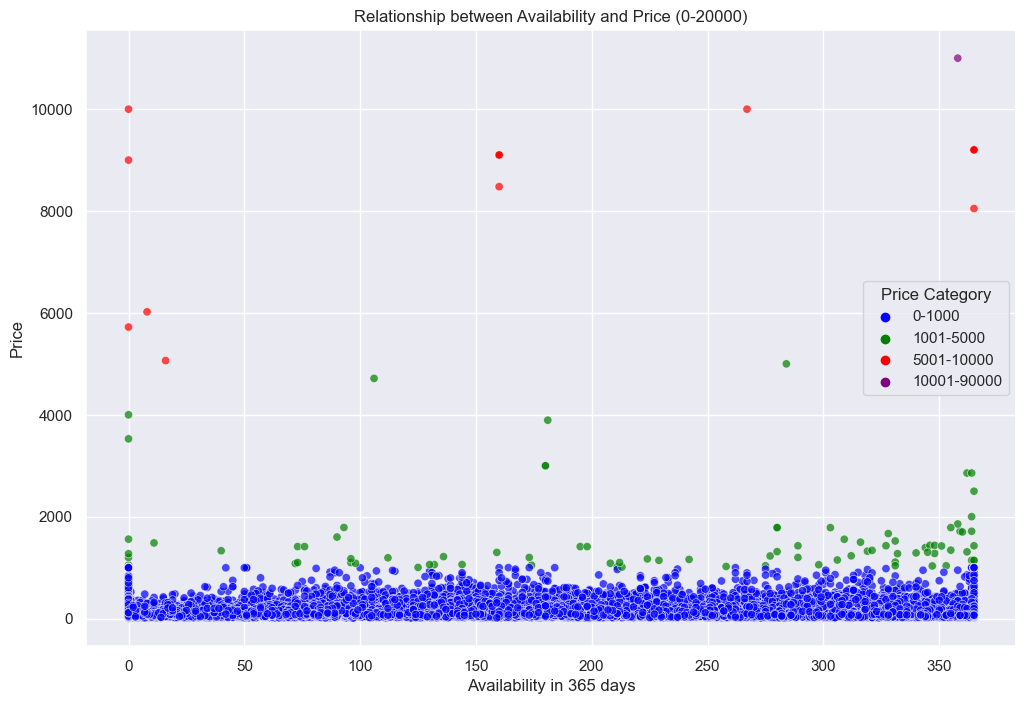

In [304]:
filtered_data = df[(df['price'] >= 0) & (df['price'] <= 20000)]
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x='availability_365', y='price', hue='price_category', palette=colors, alpha=0.7)
plt.xlabel('Availability in 365 days')
plt.ylabel('Price')
plt.title('Relationship between Availability and Price (0-20000)')
plt.legend(title='Price Category')
plt.show()

#### The availability of properties does not affect their price

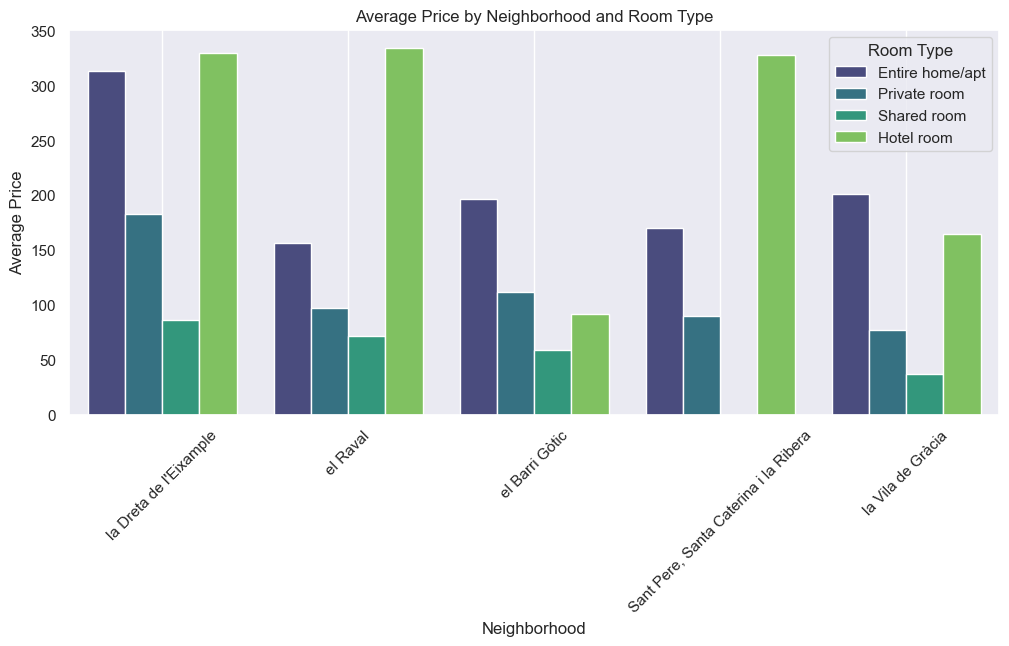

In [296]:
top_neighborhoods = df['neighbourhood'].value_counts().head(5).index.tolist()

plot_data = []

for neighborhood in top_neighborhoods:
    neighborhood_data = df[df['neighbourhood'] == neighborhood]
    room_types = neighborhood_data['room_type'].unique()
    
    for room_type in room_types:
        room_data = neighborhood_data[neighborhood_data['room_type'] == room_type]
        avg_price = room_data['price'].mean()
        plot_data.append({'Neighborhood': neighborhood, 'Room Type': room_type, 'Average Price': avg_price})

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 5))
sns.barplot(data=plot_df, x='Neighborhood', y='Average Price', hue='Room Type', palette='viridis')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood and Room Type')
plt.xticks(rotation=45)
plt.legend(title='Room Type')

plt.grid()
plt.show()

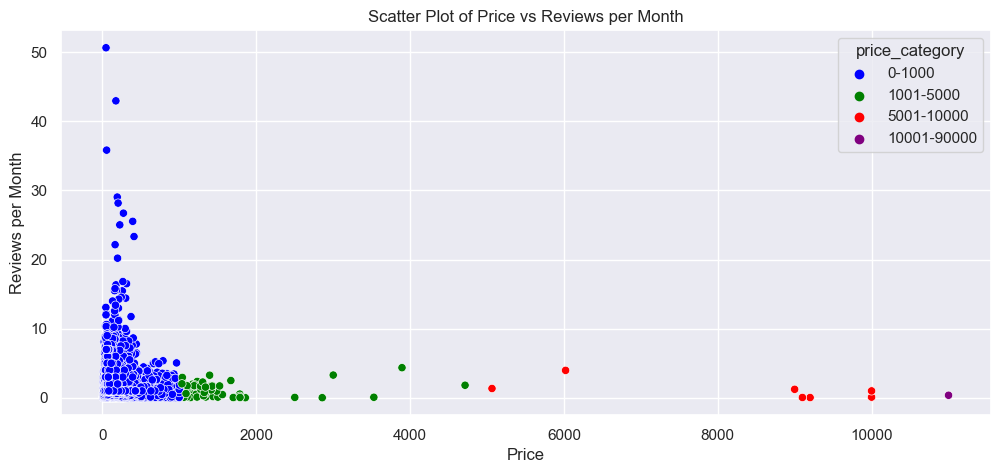

In [308]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=filtered_data, x='price', y='reviews_per_month',hue='price_category', palette=colors, alpha=1)
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.title('Scatter Plot of Price vs Reviews per Month')
plt.show()

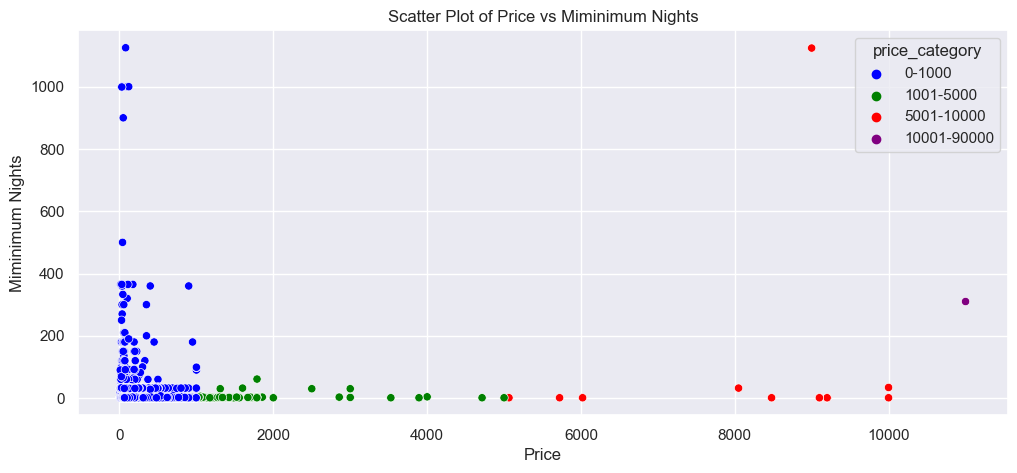

In [307]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=filtered_data, x='price', y='minimum_nights',hue='price_category', palette=colors, alpha=1)
plt.xlabel('Price')
plt.ylabel('Miminimum Nights')
plt.title('Scatter Plot of Price vs Miminimum Nights')
plt.show()